In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from glob import glob
from skimage import io
import numpy as np
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score,recall_score,accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets

In [2]:
# loading the dataset
data_source = "../data/"
train_imgs = glob(f"{data_source}training/*.png")
test_imgs = glob(f"{data_source}test/*.png")

# PREPROCESAMIENTO

In [3]:
print(train_imgs[1])

train=[]
test=[]

for x in range(0,len(train_imgs)):
    train.append(io.imread(train_imgs[x]))
X_train=np.array(train)
    
for x in range(0,len(test_imgs)):
    test.append(io.imread(test_imgs[x]))
X_test=np.array(test)

print(X_train[1].shape)
print(X_train.shape)
print(type(X_train))

../data/training\CaseNo_11-TissueId_1-Score_3-row_12288-col_13408.png
(300, 300, 3)
(56, 300, 300, 3)
<class 'numpy.ndarray'>


In [4]:
y_train=[]
y_test=[]
print(len(train_imgs))
for x in range(0,len(train_imgs)):
    Clasificacion =train_imgs[x].split('-') 
    for i in range(0,len(Clasificacion)) :
        Valores=(Clasificacion[2])
        Numero=Valores.split('_')
    y_train.append(int(Numero[1]))
print(len(y_train))
              
print(len(test_imgs))
for x in range(0,len(test_imgs)):
    Clasificacion =test_imgs[x].split('-') 
    for i in range(0,len(Clasificacion)) :
        Valores=(Clasificacion[2])
        Numero=Valores.split('_')
    y_test.append(int(Numero[1]))
print(len(y_test))

56
56
28
28


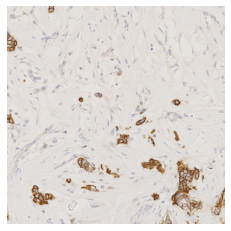

3


In [5]:
plt.figure()
plt.imshow(train[1])
plt.axis("off")
plt.show()

print((y_train[1])) 

In [6]:
n_classes = 4
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print(Y_train[1])

[0. 0. 0. 1.]


In [7]:
print(Y_train)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalizing the data to help with the training
#train /= 255
#test /= 255

In [9]:
print(len(X_train))


56


# Creación de CNN

In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(300,300,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(4, activation='softmax'))


In [12]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1/1 [==============================] - 18s 18s/step - loss: 59.9341 - accuracy: 0.2500 - val_loss: 152346.1719 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 27s 27s/step - loss: 149424.9062 - accuracy: 0.2500 - val_loss: 177217.7188 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 49s 49s/step - loss: 175108.6406 - accuracy: 0.2500 - val_loss: 174234.6094 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 54s 54s/step - loss: 172532.8281 - accuracy: 0.2500 - val_loss: 149373.6719 - val_accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 147785.6719 - accuracy: 0.2500 - val_loss: 99971.2500 - val_accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 1s 846ms/step - loss: 98285.5625 - accuracy: 0.2500 - val_loss: 60586.5820 - val_accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 58678.3945 - accuracy: 0.2500 - val_loss: 421

In [17]:
X_pred=model.predict(X_test)

In [33]:
X_pred

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [69]:
Tabla=np.array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [38]:

#y_pred=[]
#for x in range(0,len(Y_pred_2)):
    #tem=0
    #for i in range(0,len(Y_pred_2[0])):
        
        #if (Y_pred_2[x][i]>tem):
            #tem=i
            #y_pred.append(tem)
#Y_pred=np.array(y_pred)
#print(Y_pred)
#print(len(Y_pred))


In [70]:
classifier = svm.SVC(kernel='linear').fit(Tabla, Tabla.argmax(axis=1))

# Evaluación 

In [71]:
predicted_labels = classifier.predict(X_pred)

In [51]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1), predicted_labels)
print(cnf_matrix)


[[0 0 7 0]
 [0 0 7 0]
 [0 0 7 0]
 [0 0 7 0]]


In [52]:
class_names=['0' '1' '2' '3']


In [58]:
Y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

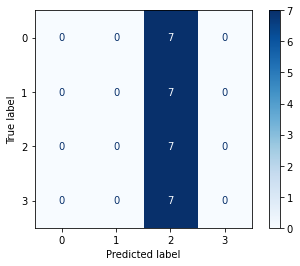

In [59]:
disp = plot_confusion_matrix(classifier, X_pred, Y_test.argmax(axis=1),
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [60]:
print(cnf_matrix.sum(axis=0))
print(np.diag(cnf_matrix) )
print(cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) )

[ 0  0 28  0]
[0 0 7 0]
[ 0  0 21  0]


In [61]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

<ipython-input-61-07a0b5d278ab>:14: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-61-07a0b5d278ab>:16: RuntimeWarning: invalid value encountered in true_divide
  NPV = TN/(TN+FN)
<ipython-input-61-07a0b5d278ab>:22: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


In [62]:
FP

array([ 0.,  0., 21.,  0.])

In [63]:
FN

array([7., 7., 0., 7.])

In [64]:
TP

array([0., 0., 7., 0.])

In [65]:
TN

array([21., 21.,  0., 21.])

In [66]:
TPR

array([0., 0., 1., 0.])

In [67]:
PPV

array([ nan,  nan, 0.25,  nan])

In [68]:
# Print the precision and recall, among other metrics
print(classification_report(y_test, predicted_labels, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000         7
           1      0.000     0.000     0.000         7
           2      0.250     1.000     0.400         7
           3      0.000     0.000     0.000         7

    accuracy                          0.250        28
   macro avg      0.062     0.250     0.100        28
weighted avg      0.062     0.250     0.100        28



C:\Users\camii\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\camii\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\camii\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
